In this notebook I will present and describe basic methods for predicting constant values.

# 1. Linear Regression

Linear regression model prediciton:

\begin{equation*}
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n  
\end{equation*}

where:
- $\hat{y}$ is predicted value
- n is the number of features
- $x_i$ is i-th feature
- $\theta_j$ is j-th model parameter 

or in vectorized form:

\begin{equation*}
\hat{y} = h_\theta (x) = \theta^T \cdot x
\end{equation*}

where:
- $\theta$ is model's parameter vector
- $\theta^T$ is the transpose of $\theta$ 
- x is the instance feature vector
- $\theta^T \cdot x$ is the dot product of $\theta^T$ and x
- $h_\theta$ is the hypothesis function

The most common metric for regression problem is the Root Mean Square Error (RMSE). SO training Linear Regression model is all about finding the value of θ that minimizes the RMSE. But it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result.

\begin{equation*}
MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})^2
\end{equation*}

## 1.1 Normal equation

This equation is a mathematical equation that finds the value of $\theta$ that minimizes the cost function.

\begin{equation*}
\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y 
\end{equation*}

Where:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 2 + 2 * X + np.random.rand(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Function to generate data is of form $y = 2 + 2x_0$ + noise

In [4]:
theta_best

array([[2.4709047 ],
       [2.02354594]])

Which is quite close to our function

In [5]:
X_new = np.array([[0], [2]])

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_best)

In [7]:
import matplotlib.pyplot as plt

Our generated data from the function is:

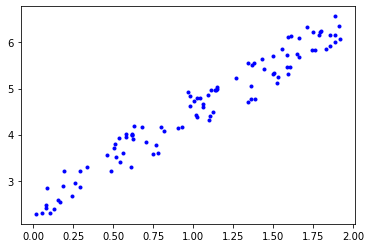

In [8]:
plt.plot(X, y, "b.")
plt.show()

And the result of our model is:

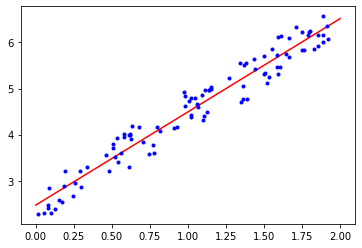

In [9]:
plt.plot(X_new, y_pred, "r-") 
plt.plot(X, y, "b.") 
plt.show()

Now lets try to predict these values using scikit.

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X_new)

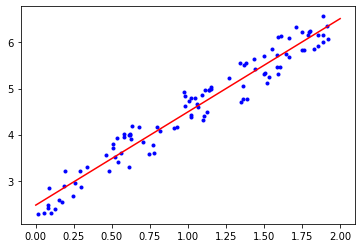

In [11]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")
plt.show()

## 1.2 Gradient Descent

This method for training linear models is better suited for cases, where we have large number of features or too many training instances to fit in memory.

The general idea of gradient descent is tweak parameters iteratively to minimize the cost function.
It starts from random value and improve gradually until it converges to minimum.

Important parameter is size of the steps, determined by the learning rate. Whe the learning rate will be too small it will take very long time to converge, and when the learning rate is too big it could overshoot and never converge.

There may be some uncertainties, that this algorithm could converge to local minimum, instead of global minimum. But fortunately MSE cost function for Linear Regression is a convex function, which means that if we pick any two points on the curve, the line joining these two points will never cross the curve. Also MSE is a continuous function with a slope that never changes abruptly. So using those two facts it is guaranteed approach arbitrarily close the global minimum.

![title](img/gradient_desc.png)
Source: Hands on Machine Learning with Scikit-Learn and Keras

### 1.2.1 Batch Gradient Descent

In order to compute gradient descent, we need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.

\begin{equation*}
\nabla_{\theta} MSE(\theta) = \frac{2}{m} X^T \cdot (X \cdot \theta - y)
\end{equation*}

This formula involves calculations over full training set X, at each gradient decent step(that's why this is called batch gradient descent).
Still gradient descent is faster for many features than normal equation.

Gradient descent step:
\begin{equation*}
\theta^{next-step} = \theta - \eta \nabla_{\theta} MSE(\theta)
\end{equation*}

Below is a quick implementation:

In [12]:
eta = 0.1
n_iter = 1000
m = 100 
theta = np.random.randn(2, 1)
for i in range(n_iter):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[2.4709047 ],
       [2.02354594]])

In [14]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    for i in range(1000):
        if i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "b-" if i > 0 else "r--")
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

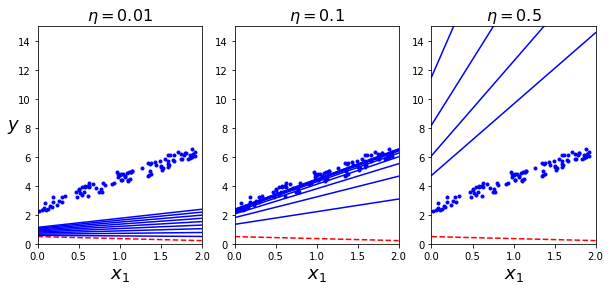

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131);
plot_gradient_descent(theta, eta=0.01)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

Above are plots for different learning rates. First learning rate is too small, third one is too big.
A good way to find good learning rate is to run grid search and limit number of iterations for them for stopping earlier.

### 1.2.2 Stochastic Gradient Descent

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Thanks to this algortihm is much faster than Batch version but due to its random nature it is much less regular than Batch Gradient Descent. So this algorithm at the end will not stop at the minimum, but will be bouncing near to the minimum, never settling down.

This randomness have one good advantage, when the cost function is irregular, this can help jump out of local minima.
A good solution for fighting the bouncing effect near the minimum, is to gradualy decrease the learning rate, helping the algorithm to settle at global minimum.

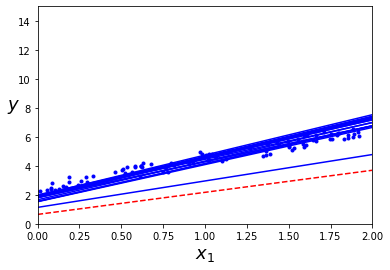

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)
m=20
theta = np.random.randn(2,1)

for epoch in range(100):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()      

It is worth to note, that the instances are picked randomly, so some instances may be picked several times per epoch, and others may not be picked at all.
To perform linear regression with Stochastic Gradient descent in scikit we can use SGDRegressor.

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, eta0=0.1, tol=1e-3) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.46186296]), array([2.08112178]))

### 1.2.3 Mini-Batch Gradient Descent

In this algorithm, at each step, we compute the gradients on small random sets of instances called mini-batches.
This algorithm will end up walking a bit closer to minimum compared to SGD, but it may be harder for him to escape local minima.

In [19]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        x_i = X_b_shuffled[i:i + minibatch_size]
        y_i = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [20]:
theta

array([[2.43937357],
       [2.16531899]])

## 2. Polynomial Regression

For cases where your data is more complex than a straight line, it is possible to create linear model to predict it. Just adding powers of each feature as new feature and then train it using linear model.

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

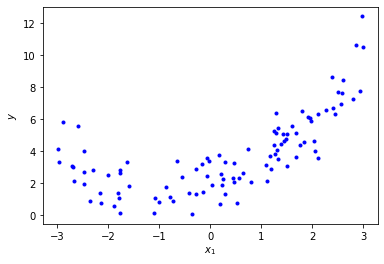

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

Now we will add to training data set the $2^{nd}$-degree polynomial of each feature from the training set.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [24]:
X[0]

array([-0.0731412])

In [25]:
X_poly[0]

array([-0.0731412 ,  0.00534963])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90652813]), array([[0.94664268, 0.52726819]]))

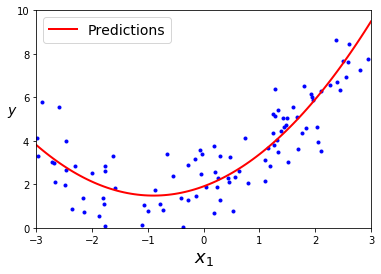

In [27]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

But we must be aware, that if we add to many polynomials of higher degrees, the model can overfit and oscilate around a simpler curve, trying to fit to every datapoint.

One way to check how your model is doing is to run cross-validation to get an estimate of model's generalization performance. And when the model is doing good on training data, but generalizes poorly according to cross-val score, then the model is overfitting.

On the other hand, when it performs poorly on on both, it is underfitting.

Another way of checking performance of our models is to look at the learning curves (plots of the model’s performance on the training set and the validation set as a function of the training set size).

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

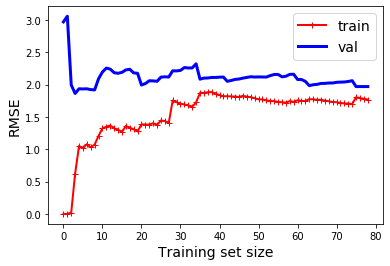

In [29]:
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

The plot above presents how the model is doing when more training samples are added. It starts from 0, when there are no training samples, and the more samples the harder it gets for the model to fit the training data perfectly.

Error on the training data is goes up to some level where adding more data points doesn't change that much.
These learning curves are fairly high and close to each other, this is typical for underfitting model, where adding more training examples doesn't change much.

Now we will try with 7-th degree polynomials.

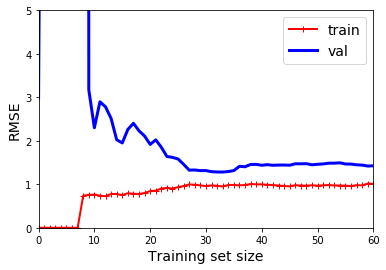

In [30]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=7, include_bias=False)), 
    ("sgd_reg", LinearRegression()),
)) 
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 60, 0, 5])
plt.show()   

We can see that the error is smaller with higher polynomial.

Additionally, there is a gap between the curves and this means that the model performs better on training set than on validation set. This means that the model is overfitting.

One way to fix overfitting model is to keep feeding more training data until validation error reaches training error.

# Bias/Variance Tradeoff

Model's generalization error can be expressed as the sum of three different errors:

- Bias
- Variance
- Irreductible error

Bias: high-bias model is most likely to underfit the training data (due to wrong assumptions of the data/model).

Variance: high-variance model is most likely to underfit the training data (due to model's excessive sensitivity to small variations in the training data, for example too many degrees of freedom)

Irreductible error: This error is from noisiness of the training data. Training data needs a cleanup 

## 3. Regularized Linear Models

A good way to reduce overfitting is to regularize the model.
A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model.

### 3.1 Ridge Regression

Ridge Regression is a regularized form of Linear Regression, where a regularization term $\alpha\sum_{i=1}^n \theta_i^2$ is added to the cost function. This forces to keep the weights of the model as small as possible.
The regularization term should be added to the cost function only during training, after that normal cost function is used for validation.

Is is common to use different cost function during testing and different during testing.

$\alpha$ controls how much we want to regularize the model, where if 0 then Ridge Regression becomes just Linear Regression, otherwise if $\alpha$ is bigger then weights get closer to zero.

Ridge Regression cost function:

\begin{equation*}
J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2
\end{equation*}

The bias term $\theta_0$ is not regularized

Ridge Regression closed-form solution:

\begin{equation*}
\hat\theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y
\end{equation*}

To perform Ridge Regression with Scikit-learn it is important to also scale the data (StandardScaler).

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.88934165]])

To perform Stochastic Gradient Descent with l2 norm.

In [32]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.89957341])

### 3.2 Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)

This is just another regularized version of Linear Regression, it also adds a regularization term to the cost function, but it used $l_1$ norm instead of $l_2$ norm.

Lasso Regression cost function:

\begin{equation*}
J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|
\end{equation*}

Lasso Regression tends to completely eliminate weights of the least important features, so it automatically performs feature selection and outputs sparse model (with few nonzero feature weights).


In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.85158628])

### 3.3 Elastic Net 

Regularization term is a mix of both Ridge and Lasso’s regularization terms.
When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

Elastic Net cost function:

\begin{equation*}
J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| +  \frac{1 - r}{2} \alpha \sum_{i=1}^n \theta_i^2
\end{equation*}

In [34]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.85366721])

![title](img/regularization.png)
Source: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

## 4. Early stopping

One of the easiest techniques of regularization is early stopping.
It's logic is to stop training as soon as the validation error reaches a minimum.

In [35]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


In [36]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [37]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

## 5. Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

Logistic Regression model estimated probability:

\begin{equation*}
\hat{p} = h_{\theta}(x) = \sigma(\theta^T \cdot x)
\end{equation*}

Logistic function:

\begin{equation*}
\sigma(t) = \frac{1}{1 + exp(-t)}
\end{equation*}

Logistic Regression model prediction:

$\hat{y}$ = 0 if $\hat{p}$ < 0.5, 1 otherwise

### Training

The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

Cost function of a single training instance:

$c(\theta)$ = $-log(\hat{p})$ if y = 1 or

$c(\theta)$ = $-log(1 - \hat{p})$ if y = 0

Logistic Regression cost function (log loss):

\begin{equation*}
J(\theta) = -\frac{1}{m} \sum_{i = 1}^m (y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)}) log(1 - \hat{p}^{(i)}))
\end{equation*}

Now let's see how this works on Iris dataset

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [39]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

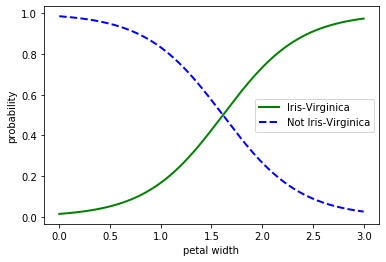

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("petal width")
plt.ylabel("probability")
plt.legend()
plt.show()

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.61561562])

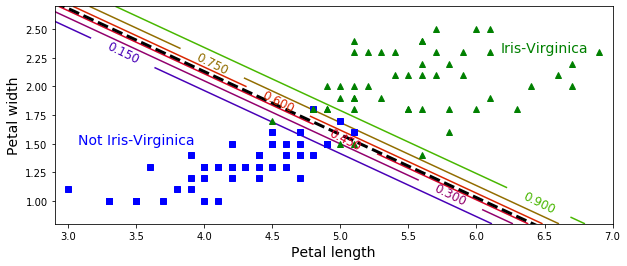

In [45]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## 6. Softmax Regression

We can create multiclass classifier from Logistic Regression which is a binary classifier. This is called Softmax Regression or Multinomial Logistic Regression.

Given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function to the scores.

Softmax score for class k:

 \begin{equation*}
 s_k(x) = \theta_k^T \cdot x
 \end{equation*}
 
 When we have the scores for each class, we estimate the probability $\hat{p}_k$ that an instance belongs to class k by running the scores through the softmax function.
 
 Softmax function:
 
\begin{equation*}
\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j = 1}^K exp(s_j(x))}
\end{equation*}

where:
- K is the number of classes
- s(x) is a vector containing the scores of each class for the instance x.
- $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

Softmax Regression classifier predicts the class with the highest estimated probability.

During training the objective is to train a model that estimates a high probability for the target class.
Here the cost function is the cross-entropy and druing training we are trying to minimize it.

Cross entropy cost function:
\begin{equation*}
J(\theta) = - \frac{1}{m} \sum_{i = 1}^m \sum_{k = 1}^K y_k^{(i)} log(\hat{p}_k^{(i)})
\end{equation*}

$y_k^{(i)}$ is equal to 1 if the target class for the ith instance is k, otherwise 0

In [46]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
softmax_reg.predict([[5, 2]])

array([2])

In [48]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])